##### Contenido bajo Creative Commons Attribution license CC-BY 4.0. (c) 2015 O. Skurtys, C. Cooper.

## Metodo de Euler implicito

Ya vimos en el notebook anterior que existen límites en el valor de $\Delta t$ para cumplir con la estabilidad. En este caso, el valor de $\alpha$ era bajo, por lo que se cumplía con la estabilidad para valores relativamente alto de $\Delta t$, sin embargo, si $\alpha$ hubiese sido más grande, podría haber ocurrido que el valor de $\Delta t$ tendría que haber sido muy pequeño para cumplir con la estabilidad, y necesitaríamos muchos pasos de tiempo para llegar al resultado final.

Por otra parte, sabemos que los métodos implícitos no tienen esta limitación, por lo que podemos llegar al resultado final en menos pasos de tiempo. Revisemos el método de Euler implícito en detalle.

Cuando decimos que el método de Euler es *explícito*, nos referimos a que la función a la derecha de la ecuación es evaluada en el tiempo $t_n$, por lo que es trivial despejar el valor de la función en $t_{n+1}$. El caso *implícito* es lo contrario: la función es evaluada en el tiempo $t_{n+1}$. De esta forma, al discretizar en el tiempo, quedamos con la siguiente ecuación

\begin{equation}
\left\{
\begin{array}{l}
y_{0} \qquad dado\\
y_{n+1} = y_n + \Delta t  f\left(y_{n+1}, t_{n+1}\right) \qquad \forall n \geq 0
\end{array}
\right.
\end{equation}

¡Vemos que para calcular $y_{n+1}$ debemos conocer $y_{n+1}$! Si la función $f(y,,t)$ es no lineal, despejar $y_{n+1}$ deja de ser trivial, y quedamos con una ecuación implícita. 

## Euler implícito en caída libre 

Veamos el caso no lineal del notebook anterior (la caída libre de Luke Aikins). Discretizando la ecuación para la velocidad, quedamos con

\begin{equation}
v_{n+1} = v_{n} + \Delta t\left(-\frac{\alpha}{m} v_{n+1}^2 + g\right),
\end{equation}

y despejando lo desconocido a la izquierda y lo conocido a la derecha, quedamos con

\begin{equation}
v_{n+1} + \frac{\Delta t \alpha}{m} v_{n+1}^2  = v_n + \Delta t g 
\end{equation}

Esta es una ecuación de segundo orden, que todavía debiésemos ser capaces de resolver explícitamente, sin embargo, en el caso general, puede que no seamos capaces de depejar $v_{n+1}$. Afortunadamente, existen algoritmos para calcular las raíces de una ecuación numéricamente disponibles en Python (algo así como cuando escriben `solve` en la TI o en [Wolfram Alpha](https://www.wolframalpha.com/)), y así obtener el valor de $v_{n+1}$. Por lo tanto, tendrán que hacer un `solve` en cada paso de tiempo.

Un ejemplo de esto es la función [`fsolve`](http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.optimize.fsolve.html), que se encuentra en la librería `scipy`:

In [1]:
from scipy.optimize import fsolve

La función `fsolve` encuentra las raíces de una ecuación de tipo $f(x) = 0$. Usemos un ejemplo cuadrático (igual al que necesitarán para el caso de Luke Aikins); para definir $f(x)$, podemos hacer

In [2]:
def f(x, a, b, c):
    return a*x**2+b*x+c

Resolvamos la ecuación $2x^2+ 3x-4=0$:

In [4]:
x0 = 0
a=2
b=3
c=-4
x_root = fsolve(f,x0,args=(a,b,c))
print (x_root)

[ 0.85078106]


Donde `x0` es una estimación del resultado final (el valor con que el método iterativo comienza a buscar la raíz). Si estamos bien, $f(x_{root})=0$; probemos:

In [6]:
print (f(x_root,a,b,c))

[  2.04281037e-14]


## A resolver!

Resuelvan el mismo problema del notebook anterior, usando un método de Euler implícito. Ayúdense de la función `scipy.optimize.fsolve` para resolver la ecuación no lineal en cada paso de tiempo. Es más, pueden usar la función `f(x,a,b,c)` definida arriba ¿pueden ustedes la ecuación discretizada con Euler implícito de la forma $ax^2+bx+c$?

Ojo que la discretización de la ecuación para la altura también debe ser implícita!

Grafiquen la velocidad y altura respecto del tiempo, y prueben valores altos de $\Delta t$ (incluso $\Delta t>8$!) ¿Ven resultados similares que en el caso explícito? ¿Por qué? ¿Qué opinen de la exactitud de los resultados usando $\Delta t$ alto?

#### Para pensar
* Si usáramos el modelo lineal descrito al principio del notebook anterior, ¿necesitaríamos `fsolve`? ¿Por qué?
* Vemos que todo se reduce a resolver una ecuación cuadrática en cada paso de tiempo ¿Podríamos despejar $v_{n+1}$ de alguna manera? No es necesario que lo implemente.

In [19]:
import numpy 
import matplotlib.pyplot as plt
%matplotlib inline
### ALUMNO
def velo(v2,alpha,v1,dt,m):
    return v2+dt*alpha*v2**2/m-v1-dt*9.81

def caida_libre_implicito(v0, h0, dt, tf, alpha, m):
    t = numpy.arange(0,tf,dt)
    vel = numpy.zeros(len(t))
    alt = numpy.zeros(len(t))
    vel[0] = v0
    alt[0] = h0
    for i in range(len(t)-1):
        t[i+1] = t[i] + dt
        v1 = vel[i]
        vel[i+1] = fsolve(velo,vel[i],args=(alpha,v1,dt,m))
        alt[i+1] = alt[i] + dt*v[i+1]
    return vel,alt,t
# Hacer funcion para integrar velocidad y altura con Euler implicito.
# Pueden copiar y pegar lo del notebook anterior como para partir!
###

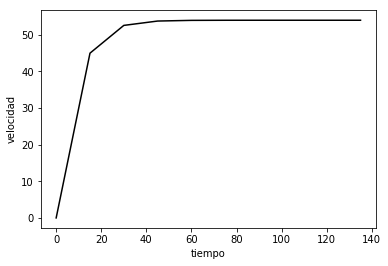

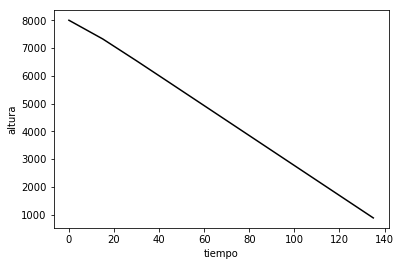

In [23]:
v0 = 0.
h0 = 8000.
tf = 150.
dt = 15
alpha = 0.27
m = 80
v,h,time = caida_libre_implicito(v0, h0, dt, tf, alpha, m)

plt.plot(time, v, c='k') 
plt.ylabel("velocidad")
plt.xlabel("tiempo")
plt.show()
plt.clf()
plt.plot(time, h, c='k') 
plt.ylabel("altura")
plt.xlabel("tiempo")
plt.show()

## Metodo del trapecio

El metodo del trapecio es un metodo de orden 2 y está definido por la formula siguiente:

\begin{equation}
\left\{
\begin{array}{l}
y_{0} \qquad dado\\
y_{n+1} = y_n + dt  \frac{f\left(y_{n+1}\right) + f\left(y_{n}\right)}{2} \qquad \forall n \geq 0
\end{array}
\right.
\end{equation}

Resuelva el mismo problema usando el método del trapecio. Siga los siguientes pasos:
* Escriba la ecuación discretizada con el método del trapecio
* Reescriba esta ecuación en forma $ax^2+bx+c$
* Resuélvala de forma similar a como resolvió el caso de Euler implícito
* Grafique los resultados

#### Para pensar

* ¿Qué ventaja tiene que este método sea de segundo orden? 
* Computacionalmente es casi igual de pesado que Euler implícito. Si tuviesen que elegir, ¿preferirían Euler implícito o el trapecio?


In [24]:
### ALUMNO
def f(v,alpha,m):
    return -alpha*v/m+9.81

def caida_libre_trapecio(v0, h0, dt, tf, alpha, m):
    t = numpy.arange(0,tf,dt)
    vel = numpy.zeros(len(t))
    alt = numpy.zeros(len(t))
    vel[0] = v0
    alt[0] = h0
    for i in range(len(t)-1):
        t[i+1] = t[i] + dt
        v1 = vel[i]
        vel[i+1] = fsolve(velo,vel[i],args=(alpha,v1,dt,m))
        vel[i+1] = vel[i] + dt*(f(v[i+1])+f(v[i]))/2     #recalculando con metodo trapecio
        h1 = alt[i]
        v2 = vel[i+1]
        alt[i+1] = alt[i] + dt*v[i+1]
        alt[i+1] = alt[i] + dt*(vel[i+1]+vel[i])/2
    return vel,alt,t
# Hagan funcion para resolver con el metodo del trapecio
# OJO: MUY parecido a Euler implicito. Copien y peguen eso aca para partir.
###

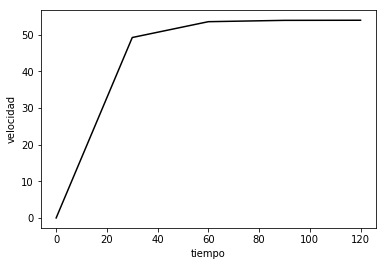

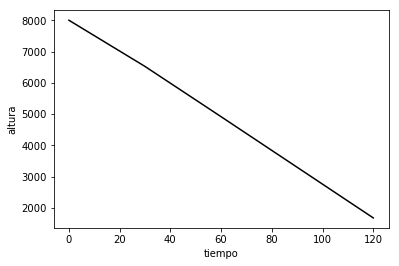

In [31]:
v0 = 0.
h0 = 8000.
tf = 150.
dt = 30
alpha = 0.27
m = 80
v,h,time = caida_libre_implicito(v0, h0, dt, tf, alpha, m)

plt.plot(time, v, c='k') 
plt.ylabel("velocidad")
plt.xlabel("tiempo")
plt.show()
plt.clf()
plt.plot(time, h, c='k') 
plt.ylabel("altura")
plt.xlabel("tiempo")
plt.show()